# sidebands
Python module to calculate electro-optic sidebands

## Phase modulator
The electric field of a phase modulator when driven with sinusoidal voltage is
$$ E = E_0 \exp(i \omega_0 t) \exp(i \beta \sin \omega t) $$
where $\omega_0 = 2 \pi c / \lambda$ is the optical frequency, $\omega = 2 \pi f$ is the drive frequency, and $\beta = \pi V / V_{\pi}$ is the drive amplitude. Expanded in Bessel functions, we have
$$ E = E_0 \exp(i \omega_0 t) \sum_{-\infty}^{\infty} J_n(\beta) \exp(i n \omega t) $$
Defining $\omega_n \equiv \omega_0 + n \omega$,
$$ E = E_0 \sum_{-\infty}^{\infty} \exp(i \omega_n t) J_n(\beta) $$
The Bessel functions for negative $n$ satisfy $ J_{-n}(\beta) = (-1)^n J_n(\beta) $.
The relative intensity $I_n$ of the sideband at $\omega_n$ is
$$ I_n = J_n^2(\beta) $$

In [1]:
def pmintensity(n,b): # n = sideband number, b = pi*V/Vpi
    from scipy.special import jv
    return jv(n,b)**2

The sideband intensities sum to one.

In [62]:
beta,N = 1.5,10
sum(pmintensity(n,beta) for n in range(-N,N+1))

0.9999999999999997

In [63]:
pmintensity(0,0)

1.0

A plot of $I_n$ as a function of drive voltage for the first few sidebands, assuming $V_\pi$ = 1 V.

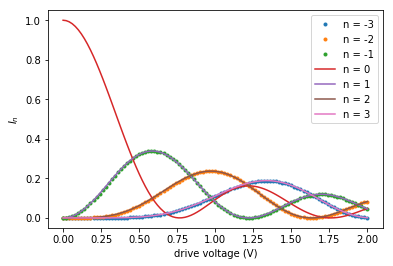

In [84]:
def pmintensityplot(vpi,numpnts=101,N=3,vmax=2):
    import matplotlib.pyplot as plt
    import numpy as np
    wx = np.linspace(0,vmax,numpnts)
    for n in range(-N,N+1):
        plt.plot(wx,pmintensity(n,np.pi*wx/vpi),'.' if n<0 else '-',label=f'n = {n}')
    plt.legend(); plt.xlabel('drive voltage (V)'); plt.ylabel('$I_n$')
pmintensityplot(vpi=1)

## Mach Zehnder interferometer

The electric field at the output of an MZI is proportional to the sum of the fields in each leg
$$ E = E_0 \exp[i ω_0 t + i \phi_0 + i \beta_0 \sin ω t] + E_1 \exp[i ω_0 t + i \phi_1 + i \beta_1 \sin ω t] $$
after Bessel expansion we have
$$ E = \exp[iω_0t] \sum_{-\infty}^{\infty} \exp[inωt] \left( E_0 \exp[iφ_0] J_n(β_0) + E_1 \exp[iφ_1] J_n(β_1) \right) $$
Defining $\omega_n \equiv \omega_0 + n \omega$,
$$ E = \sum_{-\infty}^{\infty} \exp[iω_nt] \left( E_0 \exp[iφ_0] J_n(β_0) + E_1 \exp[iφ_1] J_n(β_1) \right) $$
The relative intensity $I_n$ of the sideband at $\omega_n$ is
$$ I_n = \lvert E_0 \exp[iφ_0] Jn(β_0) + E_1 \exp[iφ_1] Jn(β_1) \rvert ^2 $$
$$ = E_0^2 J_n^2(β_0) + E_1^2 J_n^2(β_1) + 2 E_0 E_1 J_n(β_0) J_n(β_1) \cos(φ) $$
where $φ = φ_1 - φ_0$


In [86]:
def mzterm(n,e0,e1,phi,b0,b1):
    from scipy.special import jv
    return e0*jv(n,b0) + e1*jv(n,b1)*exp(1j*phi)